In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/voterfile .csv')
print(df.head)

<bound method NDFrame.head of        optimus_id   age                 party ethnicity maritalstatus  \
0          861681  69.0            Republican  European       Married   
1         1084850  20.0  American Independent  European           NaN   
2          644435  28.0          Non-Partisan  European           NaN   
3           57683  78.0  American Independent  European       Married   
4          167371  68.0            Democratic       NaN           NaN   
...           ...   ...                   ...       ...           ...   
49995      251398  23.0  American Independent  European           NaN   
49996      684299  24.0            Democratic       NaN           NaN   
49997      369815  28.0          Non-Partisan  European           NaN   
49998      276455  49.0            Republican  European           NaN   
49999      878074  69.0  American Independent  European           NaN   

                                dwellingtype     income  \
0                Single Family Dwe

In [4]:
print(df.isnull().sum())

optimus_id                              0
age                                    17
party                                   0
ethnicity                            5192
maritalstatus                       30638
dwellingtype                        26083
income                                  0
education                           22410
cd                                      4
dma                                     0
occupationindustry                  41808
vh14p                                   0
vh12g                                   0
vh12p                                   0
vh10g                                   0
vh10p                                   0
vh08g                                   0
vh08p                                   0
vh06g                                   0
vh06p                                   0
vh04g                                   0
vh04p                                   0
vh02g                                   0
vh02p                             

In [6]:
features = ['age', 'vh12g', 'vh10g', 'vh08g', 'party', 'ethnicity',
            'maritalstatus', 'education', 'net_worth', 'home_owner_or_renter']

df=df.dropna(subset=features)
df_encoded = pd.get_dummies(df[features], drop_first=True)

voter_ids = df['optimus_id'].reset_index(drop=True)# saves voter id
target = df['vh12g'].reset_index(drop=True)

X = df_encoded
y = target

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

vote_prob = model.predict_proba(X_test)[:, 1]
vote_pred = (vote_prob > 0.5).astype(int)

print(classification_report(y_test, vote_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       1.00      1.00      1.00       816

    accuracy                           1.00      1703
   macro avg       1.00      1.00      1.00      1703
weighted avg       1.00      1.00      1.00      1703



In [9]:
X_test_reset = X_test.reset_index(drop=True)

result_df = pd.DataFrame()

result_df['optimus_id'] = df.loc[X_test.index, 'optimus_id'].values
result_df = pd.concat([result_df, X_test_reset], axis=1)
result_df['vote'] = vote_pred
result_df['vote_prob'] = vote_prob

# Save to CSV
result_df.to_csv('voterTurnoutPredictions.csv', index=False)

In [11]:
df = pd.read_csv("/content/voterTurnoutPredictions.csv")
df.head()


,optimus_id,age,vh12g,vh10g,vh08g,party_Democratic,party_Green,party_Libertarian,party_Non-Partisan,party_Other,...,net_worth_$10000-24999,net_worth_$100000-249999,net_worth_$25000-49999,net_worth_$250000-499999,net_worth_$499999+,net_worth_$5000-9999,net_worth_$50000-99999,home_owner_or_renter_Likely Renter,vote,vote_prob
0,61721,69.0,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0,0.001223
1,820089,69.0,1,1,1,False,False,False,True,False,...,False,True,False,False,False,False,False,False,1,0.997276
2,246928,47.0,0,1,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,0,0.002891
3,556771,68.0,0,1,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,0,0.007008
4,55412,65.0,0,0,0,False,False,False,True,False,...,False,False,False,False,True,False,False,False,0,0.001020


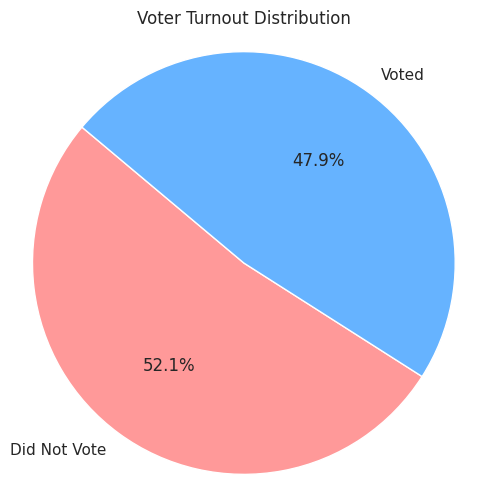

In [16]:
df = pd.read_csv("voterTurnoutPredictions.csv")

turnout_counts = df['vote'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(turnout_counts, labels=["Did Not Vote", "Voted"], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], startangle=140)
plt.title("Voter Turnout Distribution")
plt.axis("equal")
plt.show()
